In [ ]:
#Moving Average __--__--

[*********************100%***********************]  1 of 1 completed


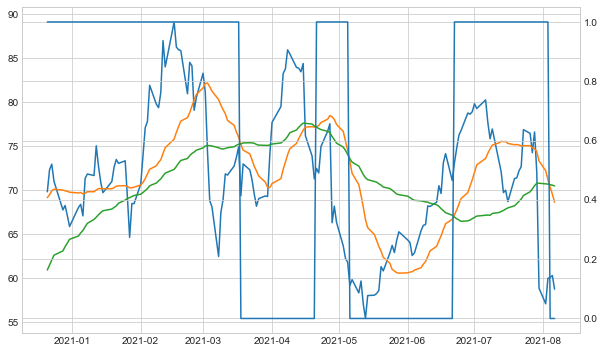

In [87]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.style.use("seaborn-whitegrid")
import pandas as pd
import numpy as np


df = yf.download('PINS', start = '2020-10-10')


def strategy(df, sma1, sma2):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1)
    df['SMA1'] = df.Close.rolling(sma1).mean()
    df['SMA2'] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df['position'] = np.where(df['SMA1'] > df['SMA2'], 1,0)
    df['stratret'] = df['position'].shift(1) + df['ret']
    df = df.dropna()
    return df
    
    
def performance(df):
    return np.exp(df[['ret', 'stratret']].sum())
 
''' 
performance(strategy(df,20,50))
'''

stratdf = strategy(df,20,50)


fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
ax.plot(stratdf[['Close', 'SMA1','SMA2']])
ax2.plot(stratdf['position'])

In [81]:
SMA_list1 = range(30,101,5)
SMA_list2 = range(130,201,5)

In [82]:
def Tester(SMAlist1, SMAlist2):
    profits = []
    a,b = [], []
    
    for i,e in zip(SMA_list1, SMA_list2):
        profit = performance(strategy(df,i,e))
        profits.append(profit)
        a.append(i)
        b.append(e)
            
    col = {'level_0':'SMA1', 'level_1': 'SMA2'}
    frame = pd.DataFrame(profits, [a,b]).reset_index().rename(columns=col)
    frame['edge'] = frame.stratret - frame.ret
    return frame.sort_values('edge', ascending = False)

In [76]:
Tester(SMA_list1, SMA_list2)

,SMA1,SMA2,ret,stratret,edge
0,30,130,4.667223,6.176992e+85,6.176992e+85
1,35,135,4.726145,2.301076e+85,2.301076e+85
2,40,140,4.395293,7.872584e+84,7.872584e+84
3,45,145,4.108086,9.958182e+83,9.958182e+83
4,50,150,2.485612,8.154267e+82,8.154267e+82
5,55,155,2.752305,3.321649e+82,3.321649e+82
9,75,175,2.281707,2.753702e+82,2.753702e+82
8,70,170,2.210969,2.668331e+82,2.668331e+82
6,60,160,2.432364,1.079919e+82,1.079919e+82
7,65,165,2.675188,1.607415e+81,1.607415e+81
